In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Define the base directory
base_dir = '../../results/real/time_memory/{}/run_{}/'

graph_info = [
    {'graph_name': 'CU', 'n': 49, 'm': 107, 'm/n': 2.18, 'kPathRun': '20250116_210345', 'kLevRun': '20250115_103649'},
    {'graph_name': 'AJazz', 'n': 198, 'm': 2742, 'm/n': 13.85, 'kPathRun': '20250116_210346', 'kLevRun': '20250115_103649'},
    {'graph_name': 'HM', 'n': 2426, 'm': 16631, 'm/n': 6.85, 'kPathRun': '20250116_210347', 'kLevRun': '20250115_103651'},
    {'graph_name': 'ArxAP', 'n': 18771, 'm': 198050, 'm/n': 10.55, 'kPathRun': '20250116_210351', 'kLevRun': '20250115_103704'},
    {'graph_name': 'AsCaida', 'n': 26475, 'm': 53381, 'm/n': 2.02, 'kPathRun': '20250116_210635', 'kLevRun': '20250115_103905'},
    {'graph_name': 'BrightK', 'n': 58228, 'm': 214078, 'm/n': 3.68, 'kPathRun': '20250116_210957', 'kLevRun': '20250115_103908'},
    {'graph_name': 'LMocha', 'n': 104103, 'm': 2193083, 'm/n': 21.07, 'kPathRun': '20250116_211408', 'kLevRun': '20250115_104215'},
    {'graph_name': 'FlickrE', 'n': 105938, 'm': 2316948, 'm/n': 21.87, 'kPathRun': '20250116_222732', 'kLevRun': '20250115_110049'},
    {'graph_name': 'WordNet', 'n': 146005, 'm': 656999, 'm/n': 4.5, 'kPathRun': '20250116_233806', 'kLevRun': '20250115_112654'},
    {'graph_name': 'Douban', 'n': 154908, 'm': 327162, 'm/n': 2.11, 'kPathRun': '20250116_235808', 'kLevRun': '20250115_124239'},
    {'graph_name': 'Gowalla', 'n': 196591, 'm': 950327, 'm/n': 4.83, 'kPathRun': '20250117_002520', 'kLevRun': '20250115_124544'},
    {'graph_name': 'Dblp', 'n': 317080, 'm': 1049866, 'm/n': 3.31, 'kPathRun': '20250117_011000', 'kLevRun': '20250115_134811'},
    {'graph_name': 'Amazon', 'n': 334863, 'm': 925872, 'm/n': 2.76, 'kPathRun': '20250117_121240', 'kLevRun': '20250116_190606'},
    {"graph_name": "Twitch", "n": 168114, "m": 6797557, "m/n": 40.43, "kPathRun": "20250122_154424", "kLevRun": "20250122_144259"},
]

# Function to read CSV files
def read_data(graph_name, run):
    graph_dir = base_dir.format(graph_name, run)
    data_list = []

    if os.path.isdir(graph_dir):
        for heuristic_dir in os.listdir(graph_dir):
            if heuristic_dir.startswith('klev_') or heuristic_dir.startswith('kpath_'):
                if heuristic_dir.endswith('X') or heuristic_dir.endswith('Y'):
                    continue
                heuristic_path = os.path.join(graph_dir, heuristic_dir)
                if os.path.isdir(heuristic_path):
                    csv_path = os.path.join(heuristic_path, 'aggregate_results.csv')
                    if os.path.exists(csv_path):
                        df = pd.read_csv(csv_path)
                        if df.empty:
                            print(f"Skipping empty CSV file: {csv_path}")
                            continue
                        df['graph_name'] = graph_name
                        df['run'] = run
                        df['heuristic'] = heuristic_dir
                        data_list.append(df)

    if not data_list:
        print(f"No valid data found for graph: {graph_name}, run: {run}")
        return pd.DataFrame()  # Return an empty DataFrame

    # Concatenate all the data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)
    all_data['Average Memory (MB)'] = (all_data['Average Memory (KB)'] / 1024).round(2)
    return all_data

In [5]:
# Function to plot data
def plot_data(all_data, graph_name):
    if all_data.empty:
        print(f"No data to plot for graph: {graph_name}")
        return

    sns.set(style="whitegrid")

    # Create a figure and axes for the plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to control the overall size

    # Define the order for the heuristics
    heuristics_present = all_data['heuristic'].unique()
    if any(h.startswith('klev_') for h in heuristics_present):
        # order = ['klev_0', 'klev_1', 'klev_2', 'klev_N', 'klev_X', 'klev_Y']
        order = ['klev_0', 'klev_1', 'klev_2', 'klev_N']
    else:
        # order = ['kpath_0', 'kpath_1', 'kpath_2', 'kpath_N', 'kpath_X']
        order = ['kpath_0', 'kpath_1', 'kpath_2', 'kpath_N']

    # Plot for Average User Time (s)
    sns.lineplot(ax=axes[0], data=all_data, x='K', y='Average User Time (s)', hue='heuristic', hue_order=order, marker='o', ci=None)
    axes[0].set_title(f'Average Time (s) vs K for {graph_name}')
    axes[0].xaxis.get_major_locator().set_params(integer=True)
    axes[0].set_xticks(range(1, 11))
    axes[0].set_xlabel('K')
    axes[0].set_ylabel('Average Time (s)')

    # Plot for Average Memory (KB)
    sns.lineplot(ax=axes[1], data=all_data, x='K', y='Average Memory (MB)', hue='heuristic', hue_order=order, marker='o', ci=None)
    axes[1].set_title(f'Average Memory (MB) vs K for {graph_name}')
    axes[1].xaxis.get_major_locator().set_params(integer=True)
    axes[1].set_xticks(range(1, 11))
    axes[1].set_xlabel('K')
    axes[1].set_ylabel('Average Memory (MB)')

    # Plot for Passes
    sns.lineplot(ax=axes[2], data=all_data, x='K', y='Passes', hue='heuristic', hue_order=order, marker='o', ci=None)
    axes[2].set_title(f'Passes vs K for {graph_name}')
    axes[2].xaxis.get_major_locator().set_params(integer=True)
    axes[2].yaxis.get_major_locator().set_params(integer=True)
    axes[2].set_xticks(range(1, 11))
    axes[2].set_xlabel('K')
    axes[2].set_ylabel('Passes')

    # Adjust the layout
    plt.tight_layout()
    plt.show()


In [6]:
# Function to plot data for a specific variant
def plot_data_for_variant(all_data, graph_name, variant):
    if all_data.empty:
        print(f"No data to plot for graph: {graph_name}")
        return

    sns.set(style="whitegrid")

    # Filter data for the specific variant
    variant_data = all_data[all_data['heuristic'] == variant]

    if variant_data.empty:
        print(f"No data found for variant: {variant}")
        return

    # Create a figure and axes for the plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to control the overall size

    # Plot for Average User Time (s)
    sns.lineplot(ax=axes[0], data=variant_data, x='K', y='Average User Time (s)', marker='o', ci=None)
    axes[0].set_title(f'Average User Time (s) vs K for {graph_name} ({variant})')
    axes[0].set_xticks(range(1, 11))
    axes[0].set_xlabel('K')
    axes[0].set_ylabel('Average User Time (s)')

    # Plot for Average Memory (KB)
    sns.lineplot(ax=axes[1], data=variant_data, x='K', y='Average Memory (MB)', marker='o', ci=None)
    axes[1].set_title(f'Average Memory (MB) vs K for {graph_name} ({variant})')
    axes[1].set_xticks(range(1, 11))
    axes[1].set_xlabel('K')
    axes[1].set_ylabel('Average Memory (MB)')

    # Plot for Passes
    sns.lineplot(ax=axes[2], data=variant_data, x='K', y='Passes', marker='o', ci=None)
    axes[2].set_title(f'Passes vs K for {graph_name} ({variant})')
    axes[2].set_xticks(range(1, 11))
    axes[2].set_xlabel('K')
    axes[2].set_ylabel('Passes')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [7]:
def plot_data_for_algorithm(all_data, graph_name, algorithm):
    if all_data.empty:
        print(f"No data to plot for graph: {graph_name}")
        return

    sns.set(style="whitegrid")

    # Filter data for the specific algorithm
    algorithm_data = all_data[all_data['heuristic'].str.startswith(algorithm)]

    if algorithm_data.empty:
        print(f"No data found for algorithm: {algorithm}")
        return

    # Get unique variants for the algorithm
    variants = algorithm_data['heuristic'].unique()
    # order = ['{}_{}'.format(algorithm, suffix) for suffix in ['0', '1', '2', 'N', 'X', 'Y']]
    order = ['{}_{}'.format(algorithm, suffix) for suffix in ['0', '1', '2', 'N']]

    # Plot data for each variant in the specified order
    for variant in order:
        if variant in variants:
            plot_data_for_variant(all_data, graph_name, variant)

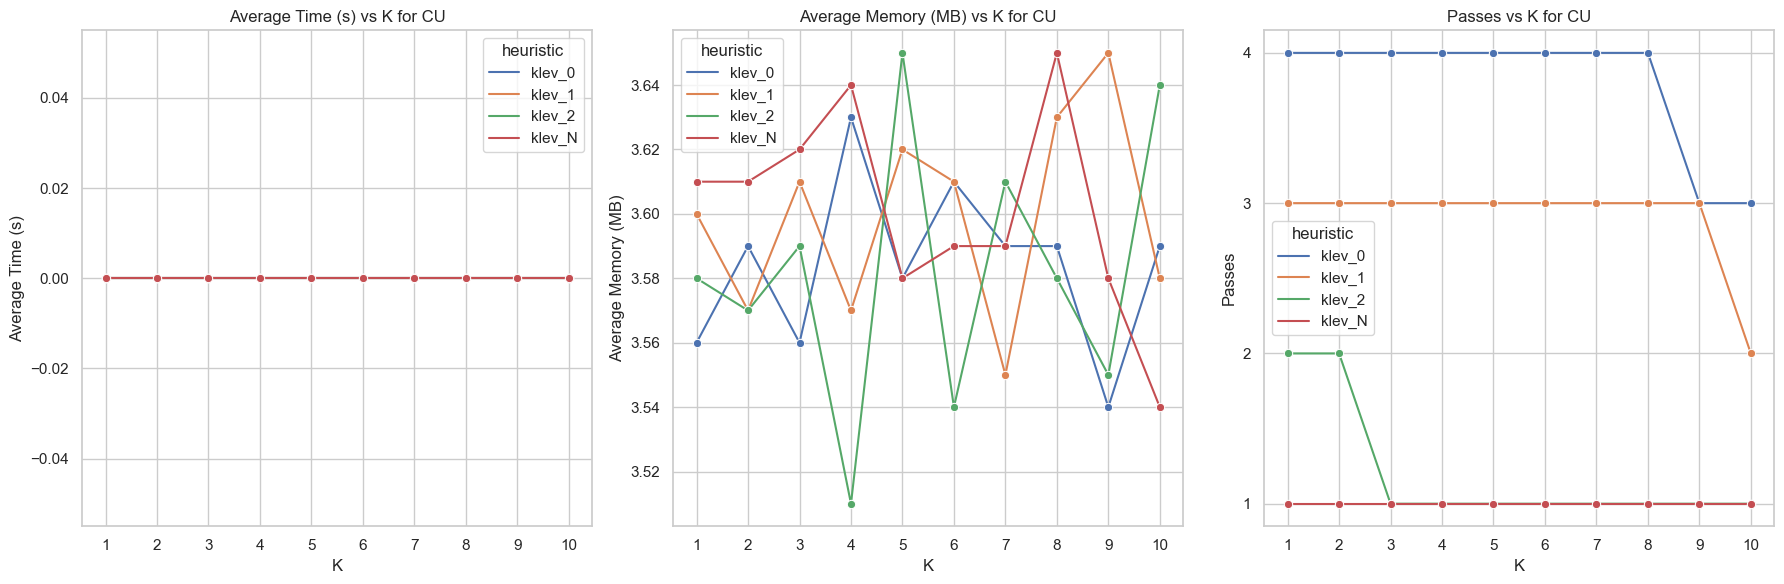

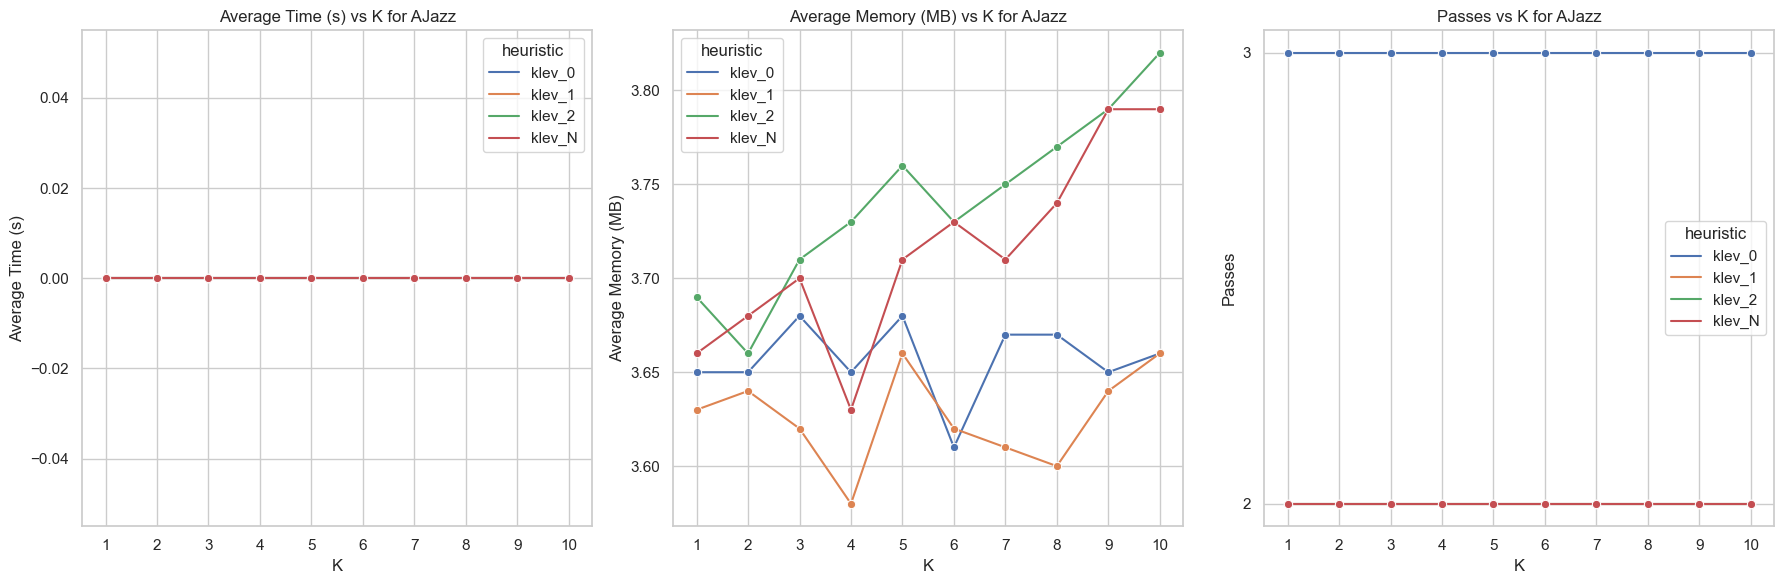

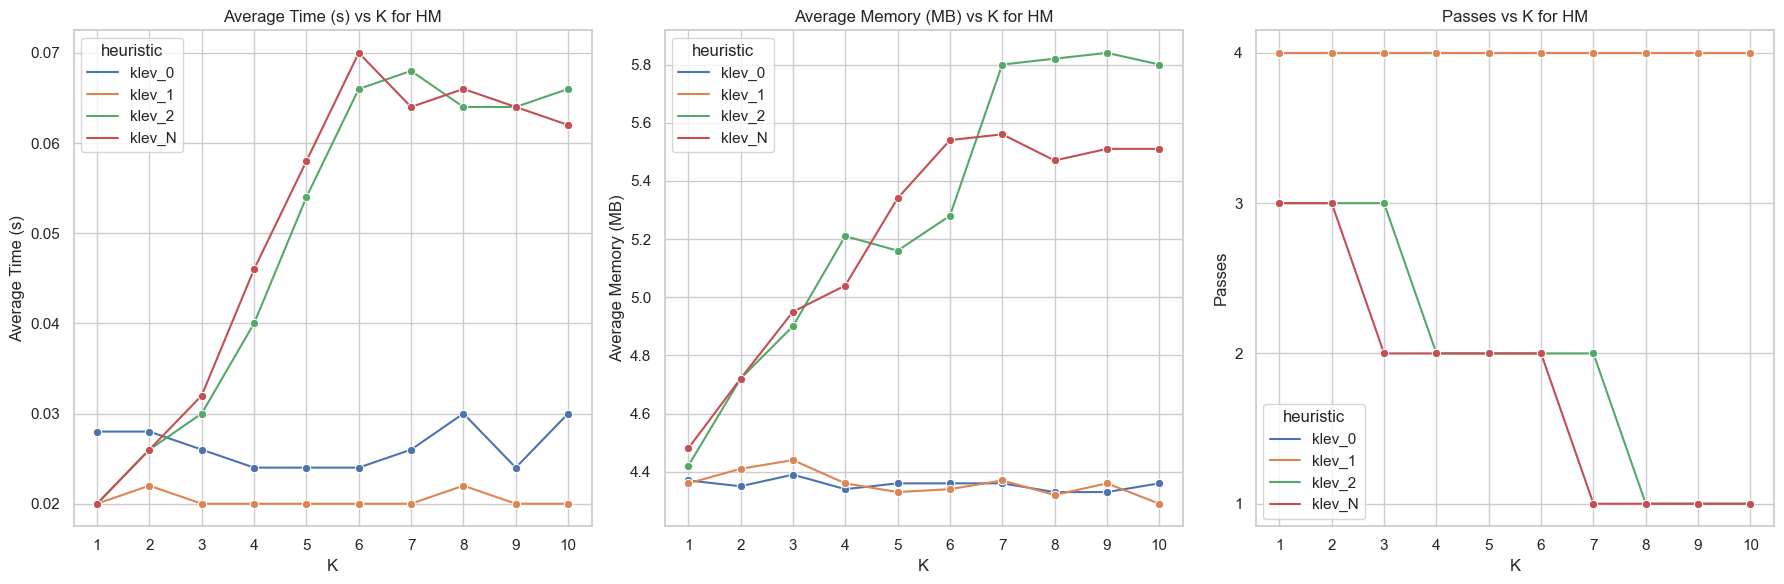

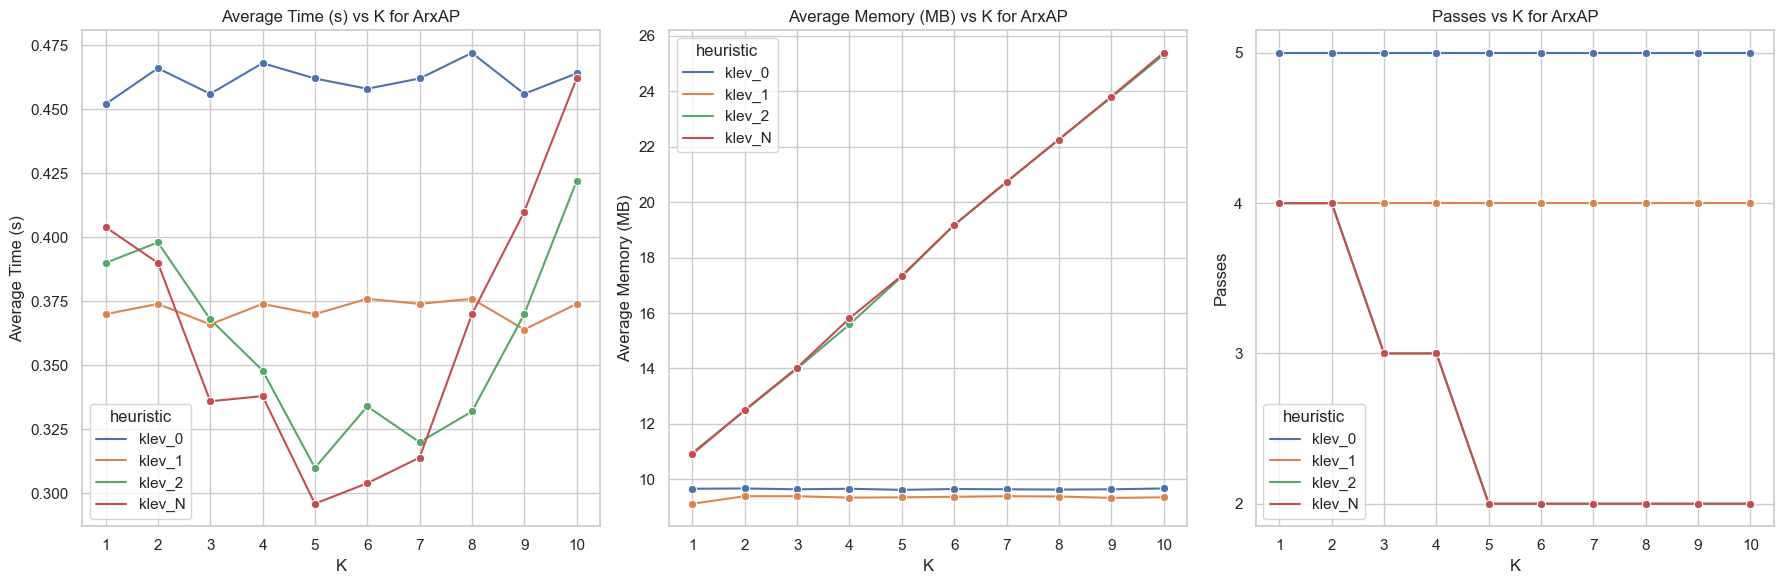

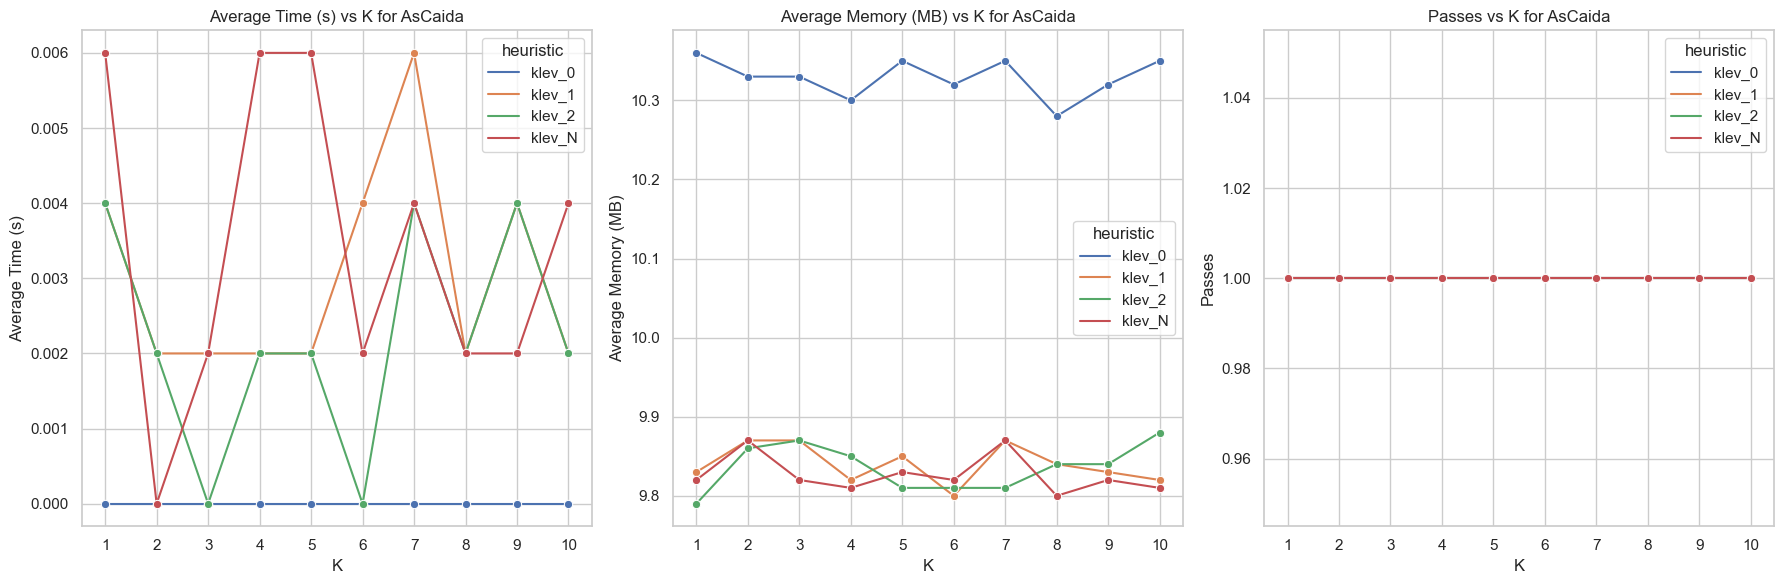

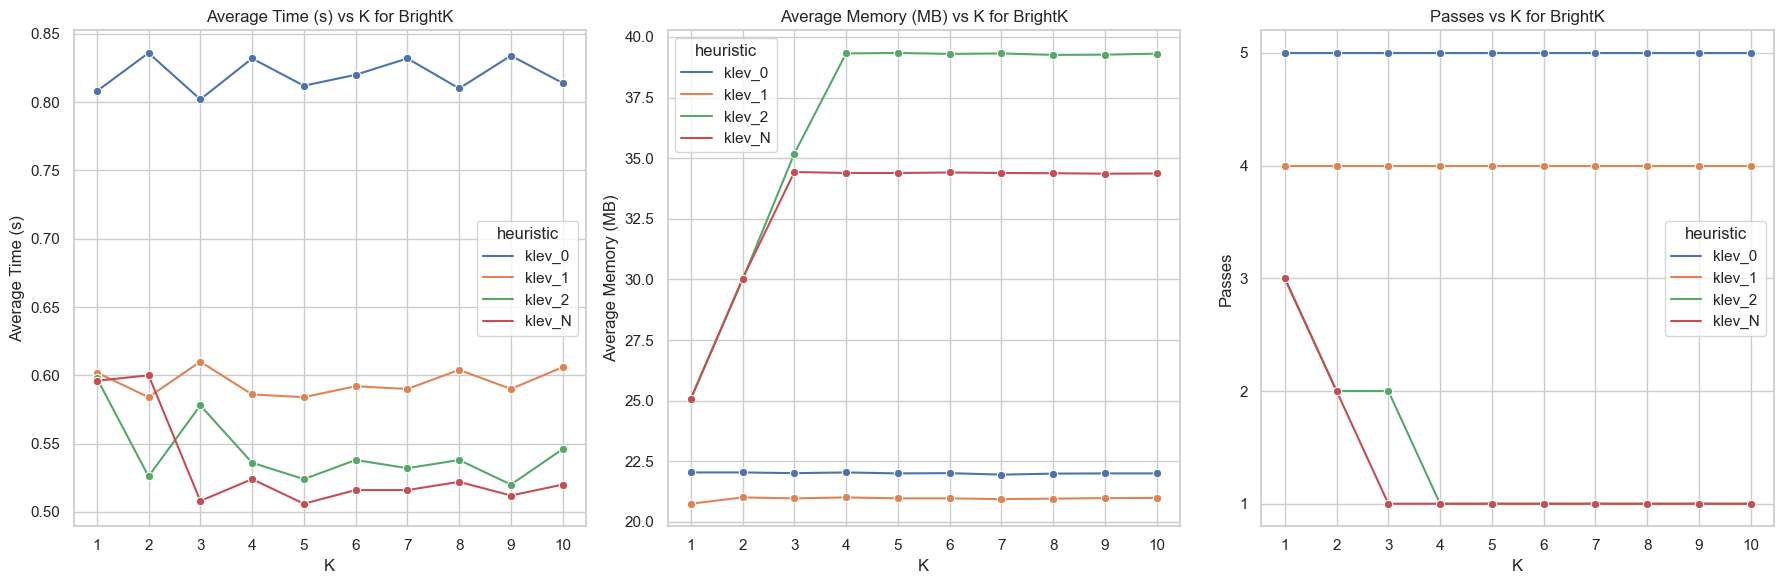

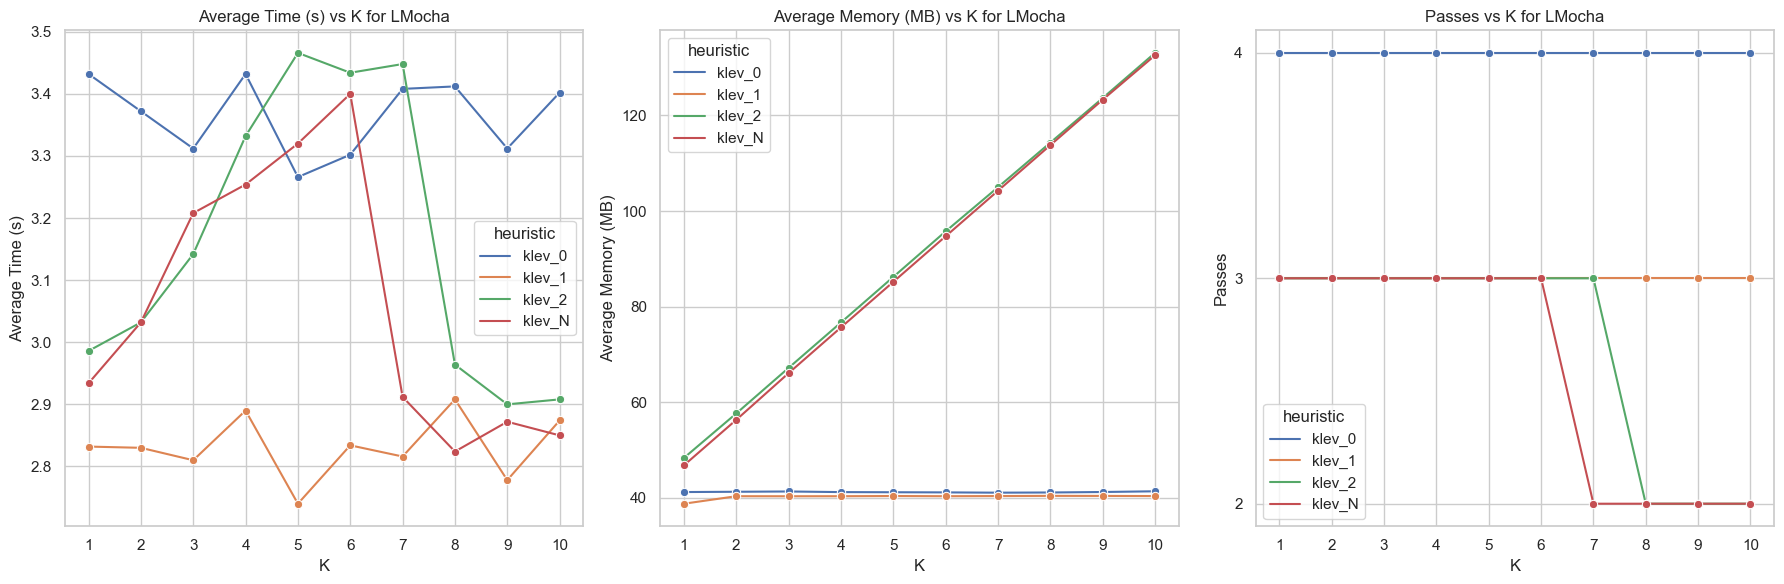

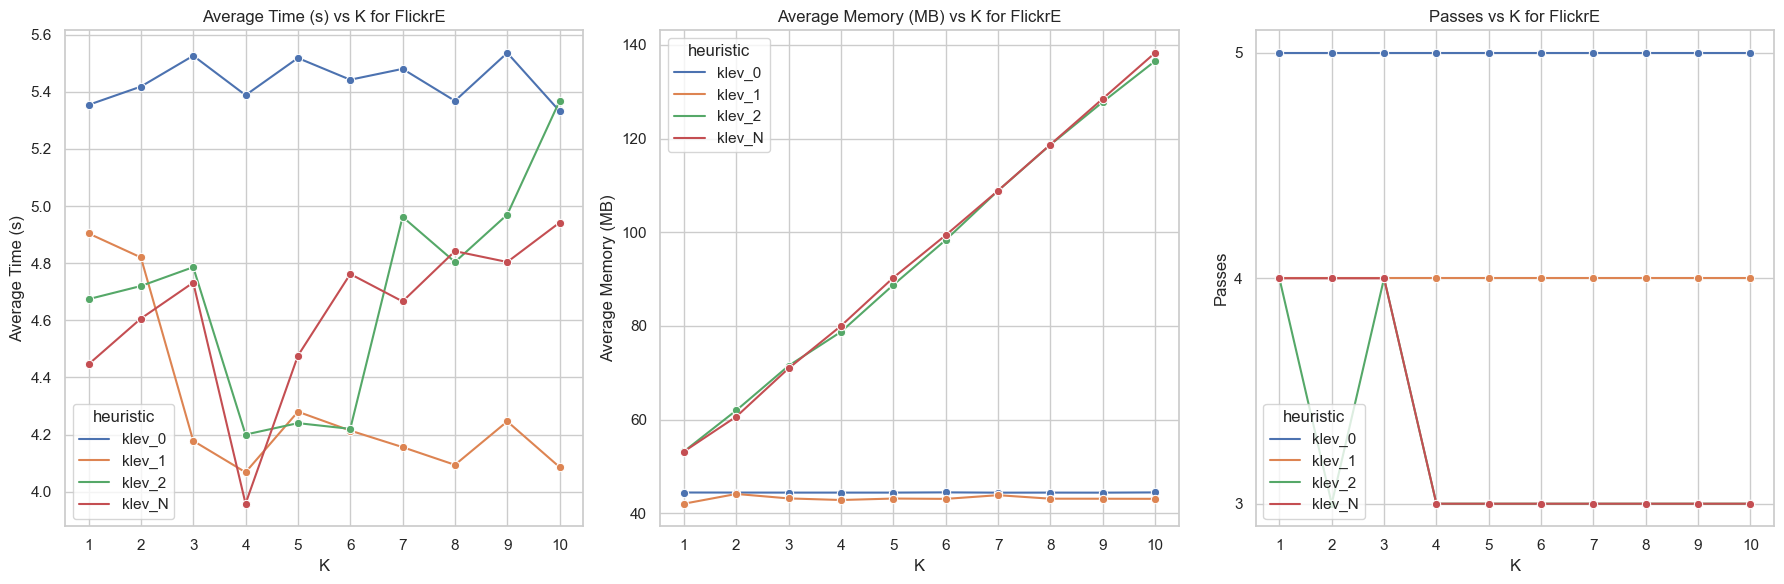

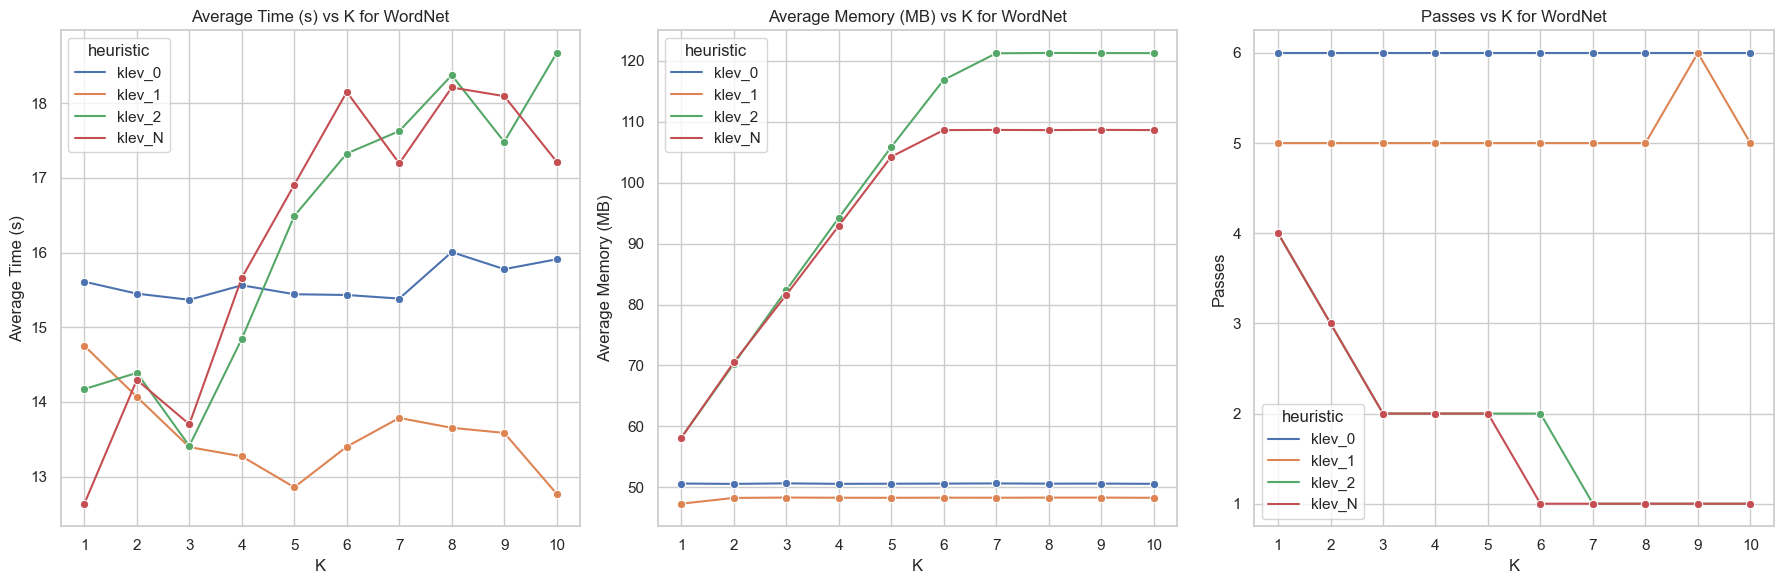

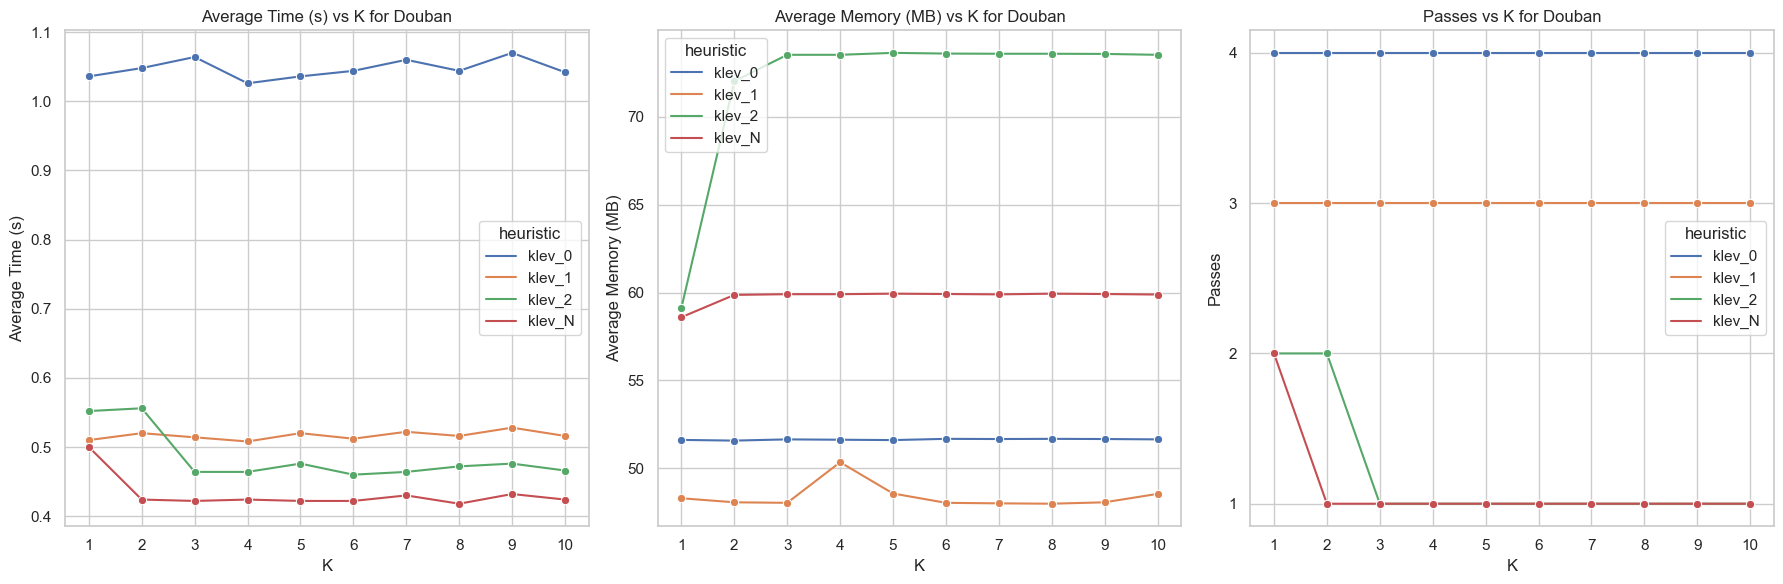

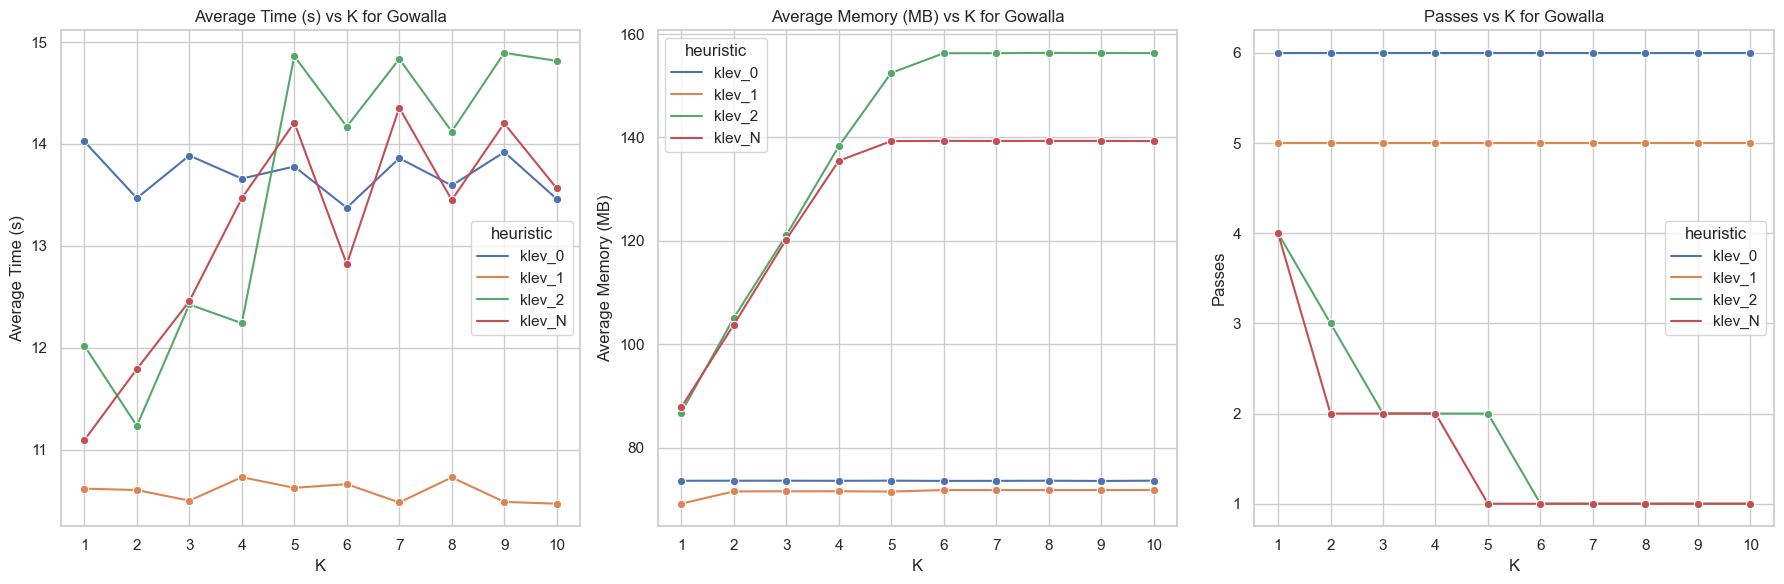

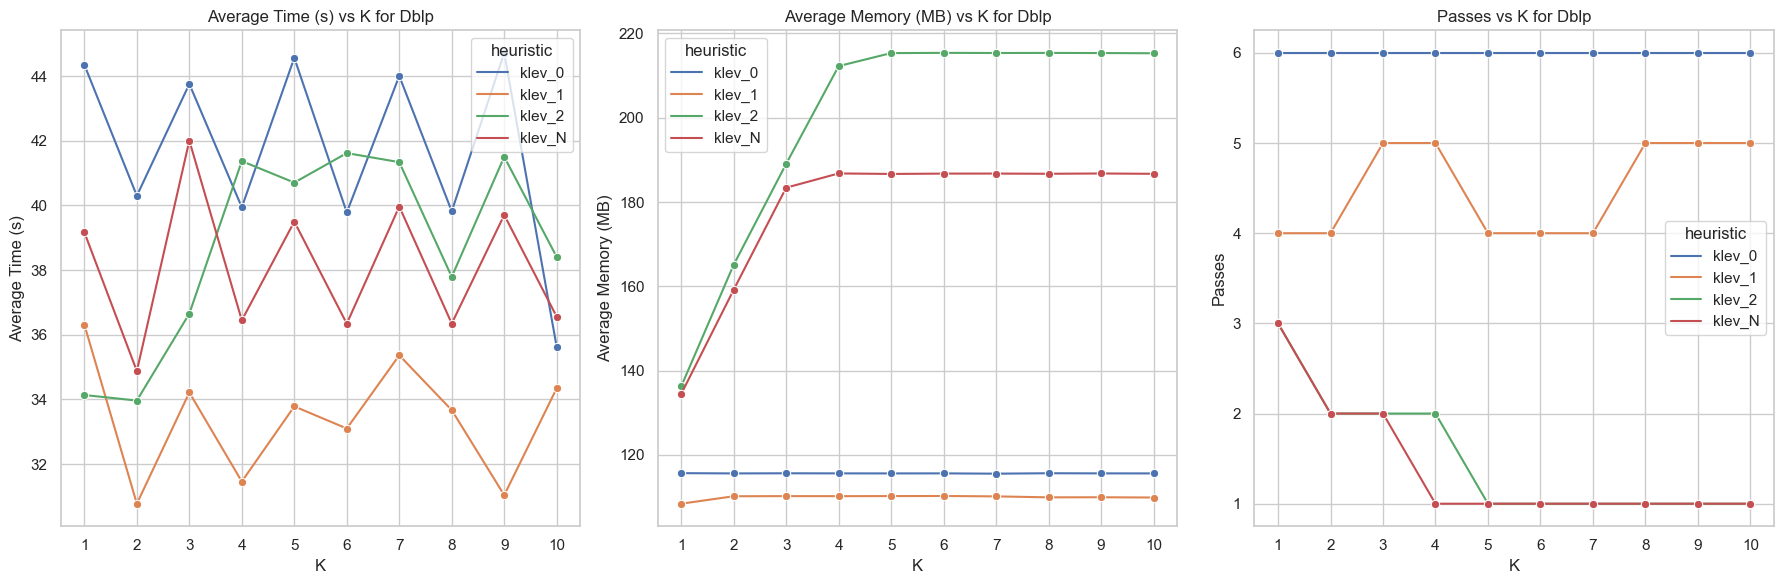

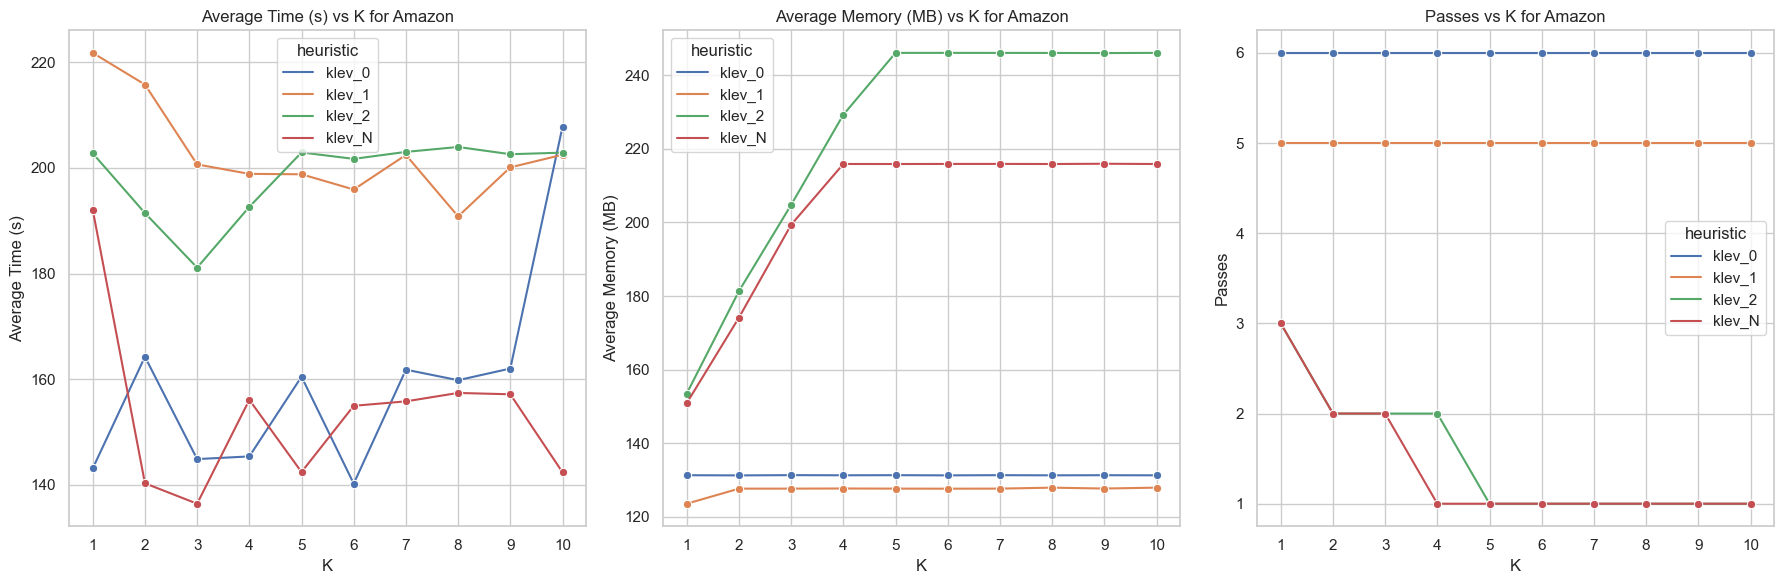

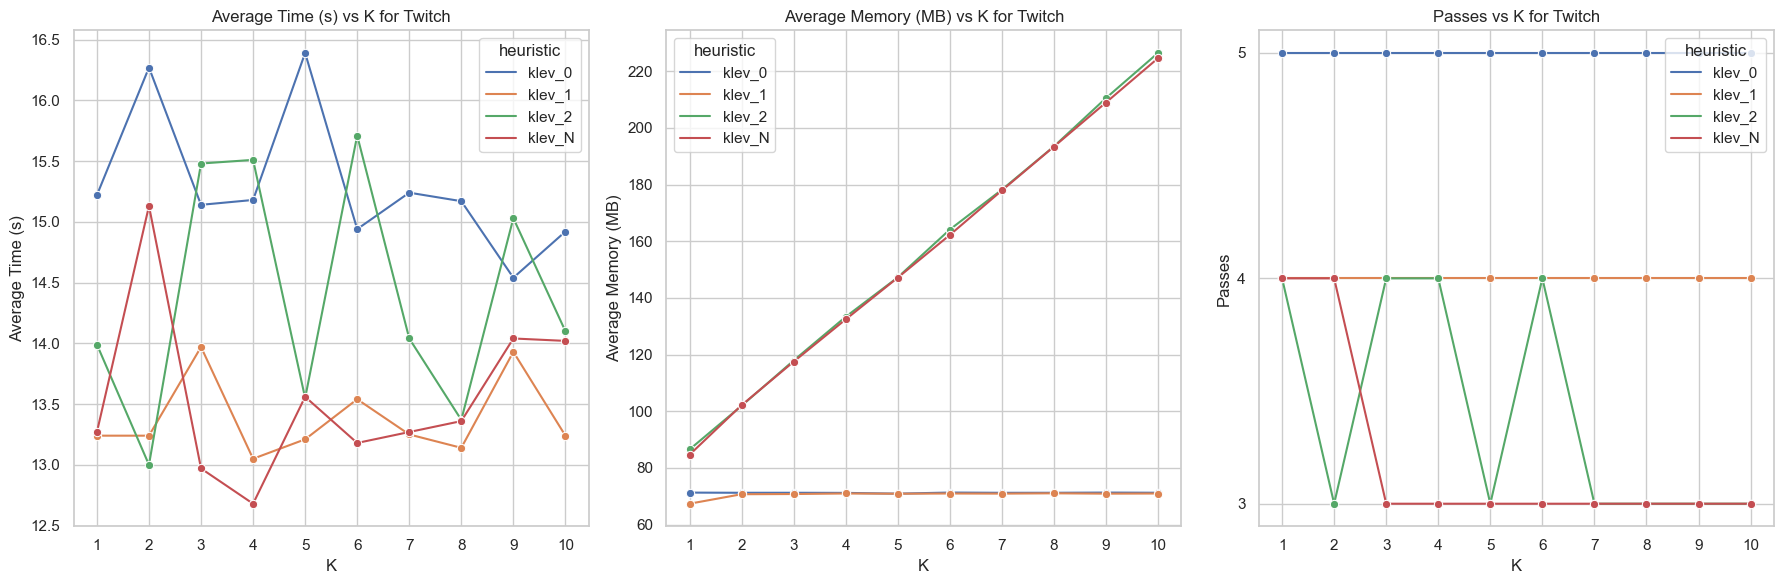

In [11]:
# graph_name = 'Amazon'
# run = '20250117_121240'

# Read the data
# all_data = read_data(graph_name, run)

# Plot the data
# plot_data(all_data, graph_name)

# Plot the data for a specific heuristic
# plot_data_for_variant(all_data, graph_name, 'kpath_N')

# Plot the data for all variants of a given algorithm
# plot_data_for_algorithm(all_data, graph_name, 'kpath')

for graph in graph_info:
    # all_data = read_data(graph['graph_name'], graph['kPathRun'])
    # plot_data(all_data, graph['graph_name'])
    all_data = read_data(graph['graph_name'], graph['kLevRun'])
    plot_data(all_data, graph['graph_name'])

In [48]:
# Function to generate the table
def generate_table(all_data, algorithm):
    # Filter data for the specific algorithm
    algorithm_data = all_data[all_data['heuristic'].str.startswith(algorithm)]

    if algorithm_data.empty:
        print(f"No data found for algorithm: {algorithm}")
        return pd.DataFrame()  # Return an empty DataFrame

    # Initialize a list to store the rows of the table
    table_rows = []

    # Get unique graphs
    graphs = algorithm_data['graph_name'].unique()

    for graph in graphs:
        # Retrieve graph info
        graph_info_entry = next((item for item in graph_info if item['graph_name'] == graph), None)
        if graph_info_entry is None:
            continue

        n = graph_info_entry['n']
        m = graph_info_entry['m']
        m_n_ratio = graph_info_entry['m/n']

        # Get unique heuristics for the graph
        heuristics = algorithm_data[algorithm_data['graph_name'] == graph]['heuristic'].unique()
        order = [f'{algorithm}_{suffix}' for suffix in ['0', '1', '2', 'N', 'X', 'Y']]
        heuristics = [h for h in order if h in heuristics]

        for heuristic in heuristics:
            heuristic_data = algorithm_data[(algorithm_data['graph_name'] == graph) & (algorithm_data['heuristic'] == heuristic)]

            # Prepare rows for time, memory, and passes
            time_row = [graph, n, m, m_n_ratio, heuristic, 'Time (s)']
            memory_row = [graph, n, m, m_n_ratio, heuristic, 'Memory (MB)']
            passes_row = [graph, n, m, m_n_ratio, heuristic, 'Passes']

            for k in range(1, 11):
                k_data = heuristic_data[heuristic_data['K'] == k]
                if not k_data.empty:
                    time_row.append(round(k_data['Average User Time (s)'].values[0], 2))
                    memory_row.append(round(k_data['Average Memory (KB)'].values[0] / 1024, 2))
                    passes_row.append(round(k_data['Passes'].values[0], 2))
                else:
                    time_row.append(None)
                    memory_row.append(None)
                    passes_row.append(None)

            # Append the rows to the table
            table_rows.append(time_row)
            table_rows.append(memory_row)
            table_rows.append(passes_row)

    # Define the columns of the table
    columns = ['Graph', 'N', 'M', 'M/N', 'Heuristic', 'Metric'] + [f'K={k}' for k in range(1, 11)]

    # Create a DataFrame from the rows
    table_df = pd.DataFrame(table_rows, columns=columns)
    return table_df

In [49]:
# Function to generate the relative table
def generate_relative_table(raw_table):
    relative_rows = []

    # Iterate over the raw table rows
    for i in range(0, len(raw_table), 3):
        time_row = raw_table.iloc[i].copy()
        memory_row = raw_table.iloc[i + 1].copy()
        passes_row = raw_table.iloc[i + 2].copy()

        # Normalize the time, memory, and passes rows
        time_values = time_row[6:].dropna().astype(float)
        memory_values = memory_row[6:].dropna().astype(float)
        # passes_values = passes_row[6:].dropna().astype(float)

        # Replace 0 values with 1 to avoid division by zero
        time_values.replace(0, 0.01, inplace=True)
        memory_values.replace(0, 0.01, inplace=True)

        if not time_values.empty:
            min_time = time_values.min()
            time_row[6:] = (time_values / min_time).round(2)

        if not memory_values.empty:
            min_memory = memory_values.min()
            memory_row[6:] = (memory_values / min_memory).round(2)

        # if not passes_values.empty:
        #     min_passes = passes_values.min()
        #     passes_row[6:] = (passes_values / min_passes).round(2)

        # Append the normalized rows to the relative rows
        relative_rows.append(time_row)
        relative_rows.append(memory_row)
        relative_rows.append(passes_row)

    # Create a DataFrame from the relative rows
    relative_table = pd.DataFrame(relative_rows, columns=raw_table.columns)
    return relative_table

In [50]:
'''
# Generate table for a real graphs in excel format

graph_name = 'Amazon'
kPathRun = '20250117_121240'
kLevRun = '20250116_190606'

# Generate the table for kpath
all_data = read_data(graph_name, kPathRun)
kpath_table = generate_table(all_data, 'kpath')
kpath_relative_table = generate_relative_table(kpath_table)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# filename_raw = f'../../results/real/time_memory/tables/kpath_table_raw_{timestamp}.xlsx'
# kpath_table.to_excel(filename_raw, index=False)
filename_relative = f'../../results/real/time_memory/tables/kpath_table_relative_{timestamp}.xlsx'
kpath_relative_table.to_excel(filename_relative, index=False)

all_data = read_data(graph_name, kLevRun)
klev_table = generate_table(all_data, 'klev')
klev_relative_table = generate_relative_table(klev_table)

# filename_raw = f'../../results/real/time_memory/tables/klev_table_raw_{timestamp}.xlsx'
# klev_table.to_excel(filename_raw, index=False)
filename_relative = f'../../results/real/time_memory/tables/klev_table_relative_{timestamp}.xlsx'
klev_relative_table.to_excel(filename_relative, index=False)
'''


In [51]:
# Function to generate tables for all graphs and save to a single Excel file with four sheets
def generate_all_tables(graph_info):
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    writer = pd.ExcelWriter(f'../../results/real/time_memory/tables/real_graphs_table_{timestamp}.xlsx', engine='xlsxwriter')

    # Initialize DataFrames to store all data
    kpath_raw_combined = pd.DataFrame()
    kpath_relative_combined = pd.DataFrame()
    klev_raw_combined = pd.DataFrame()
    klev_relative_combined = pd.DataFrame()

    for graph in graph_info:
        # Generate the table for kpath
        all_data = read_data(graph['graph_name'], graph['kPathRun'])
        kpath_table = generate_table(all_data, 'kpath')
        kpath_relative_table = generate_relative_table(kpath_table)

        # Append to combined DataFrame
        kpath_raw_combined = pd.concat([kpath_raw_combined, kpath_table], ignore_index=True)
        kpath_relative_combined = pd.concat([kpath_relative_combined, kpath_relative_table], ignore_index=True)

        # Generate the table for klev
        all_data = read_data(graph['graph_name'], graph['kLevRun'])
        klev_table = generate_table(all_data, 'klev')
        klev_relative_table = generate_relative_table(klev_table)

        # Append to combined DataFrame
        klev_raw_combined = pd.concat([klev_raw_combined, klev_table], ignore_index=True)
        klev_relative_combined = pd.concat([klev_relative_combined, klev_relative_table], ignore_index=True)

    # Write combined DataFrames to Excel file with four sheets
    kpath_raw_combined.to_excel(writer, sheet_name='kpath_raw', index=False)
    kpath_relative_combined.to_excel(writer, sheet_name='kpath_relative', index=False)
    klev_raw_combined.to_excel(writer, sheet_name='klev_raw', index=False)
    klev_relative_combined.to_excel(writer, sheet_name='klev_relative', index=False)

    writer.save()

# Example usage
generate_all_tables(graph_info)